##### Loading data

In [12]:
import numpy as np
import os

data_path = '/home/yigit/Documents/projects/irl_sfm/data/demonstrations/sfm/'
demonstrations = []

for filename in os.listdir(data_path):
    if filename.endswith(".npy"):
        demonstrations.append(np.load(os.path.join(data_path, filename), allow_pickle=True, encoding='latin1'))

num_demos = len(demonstrations)

##### Determining min length

In [13]:
min_len = 1000
min_id = -1

for i in range(num_demos):
    if len(demonstrations[i]) < min_len:
        min_len = len(demonstrations[i])
        min_id = i
        
print(f'{min_id}: {min_len}')

3: 914


##### Sampling desired_length points from each traj (Normalizing the lengths of trajs)

In [14]:
desired_len = 400 # min_len
x_dim, y_dim = 4, 2
X, Y = np.zeros((num_demos, desired_len, x_dim)), np.zeros((num_demos, desired_len, y_dim))

for i in range(num_demos):
    # normalizing the lengths
    len_demo = len(demonstrations[i])
    indices = np.linspace(0, len_demo-1, desired_len, dtype=int)  # <desired_len>-many indices are selected uniformly
    x, y = np.zeros((desired_len, x_dim)), np.zeros((desired_len, y_dim))
    for new_ind, old_ind in enumerate(indices):
        x[new_ind] = demonstrations[i][old_ind][:-2]
        y[new_ind] = demonstrations[i][old_ind][-2:]
    X[i] = x
    Y[i] = y

##### Plotting to visualize trajectories

[Text(0, 0.5, 'distance'), Text(0.5, 0, 'step')]

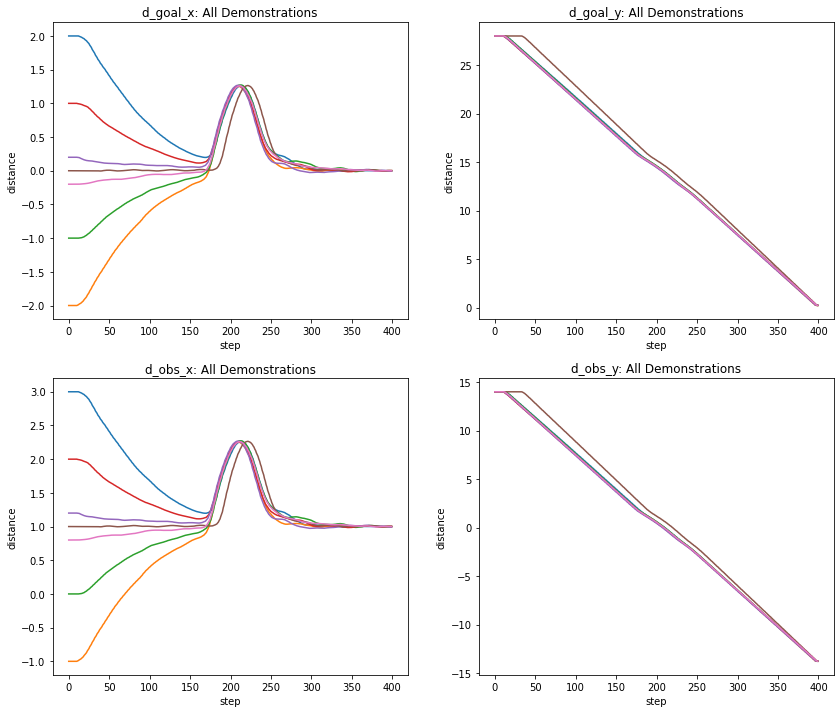

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [14, 12]

fig, axs = plt.subplots(2, 2)
for i in range(num_demos):
    axs[0, 0].plot(range(desired_len), X[i, :, 0])
axs[0, 0].set_title('d_goal_x: All Demonstrations')
axs[0, 0].set(xlabel='step', ylabel='distance')

for i in range(num_demos):
    axs[0, 1].plot(range(desired_len), X[i, :, 1])
axs[0, 1].set_title('d_goal_y: All Demonstrations')
axs[0, 1].set(xlabel='step', ylabel='distance')

for i in range(num_demos):
    axs[1, 0].plot(range(desired_len), X[i, :, 2])
axs[1, 0].set_title('d_obs_x: All Demonstrations')
axs[1, 0].set(xlabel='step', ylabel='distance')

for i in range(num_demos):
    axs[1, 1].plot(range(desired_len), X[i, :, 3])
axs[1, 1].set_title('d_obs_y: All Demonstrations')
axs[1, 1].set(xlabel='step', ylabel='distance')

##### Saving for CNMP

In [16]:
from sklearn.model_selection import train_test_split

data_path = '/home/yigit/phd/yigit_phd_thesis/cnmp/data/sfm/robot_obs_0/'

# reshaping to meet CNMP requirements
X = np.reshape(X, (num_demos, desired_len, x_dim))
Y = np.reshape(Y, (num_demos, desired_len, y_dim))

# saving 30% for validation and the 70% for training
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=0.3, random_state=42)

x_dims, gamma_dims = np.array([0, 1]), np.array([2, 3])
x_train, gamma_train = x_train[:, :, x_dims], x_train[:, :, gamma_dims]  # obstacle-related values go into gamma
x_val, gamma_val = x_val[:, :, x_dims], x_val[:, :, gamma_dims]

np.save(data_path+'d_x.npy', np.array(x_train))
np.save(data_path+'d_y.npy', np.array(y_train))
np.save(data_path+'d_gamma.npy', np.array(gamma_train))
np.save(data_path+'v_d_x.npy', np.array(x_val))
np.save(data_path+'v_d_y.npy', np.array(y_val))
np.save(data_path+'v_d_gamma.npy', np.array(gamma_val))